# Optimizers


1. What is the role of optimization algorithms in artificial neural networks?  Why are they necessary?

   Optimization algorithms play a crucial role in training artificial neural networks (ANNs) by minimizing a cost function, which measures the difference between the predicted outputs and the actual targets. These algorithms adjust the parameters (weights and biases) of the neural network to minimize this cost function. They are necessary because training ANNs involves finding the optimal values for thousands or even millions of parameters, which is a highly complex and non-linear optimization problem.


2. Explain the concept of gradient descent and its variants. Discuss their differences and tradeoffs in terms
of convergence speed and memory requirements.


   Gradient descent is an optimization algorithm used to minimize the cost function by iteratively moving in the direction opposite to the gradient of the cost function with respect to the parameters. Variants of gradient descent include:

   - **Gradient Descent:** Updates parameters by subtracting the gradient multiplied by a fixed learning rate.
   - **Stochastic Gradient Descent (SGD):** Computes the gradient and updates parameters using a randomly selected subset of the training data at each iteration, which can speed up convergence.
   - **Mini-batch Gradient Descent:** A compromise between GD and SGD, where updates are made using a small random subset of the training data.

   Trade-offs between these variants include convergence speed, memory requirements, and computational efficiency.

3. Describe the challenges associated with traditional gradient descent optimization methods (e.g., slow
convergence, local minima). How do modern optimizers address these challenges?

   Traditional gradient descent methods can face challenges such as slow convergence, getting stuck in local minima, and sensitivity to the choice of learning rate. Modern optimizers address these challenges using techniques like adaptive learning rates (e.g., Adam, RMSProp), momentum, and second-order optimization methods (e.g., AdaGrad, AdaDelta). These methods adaptively adjust the learning rate or incorporate momentum to accelerate convergence and overcome the problem of getting stuck in local minima.

4. Discuss the concepts of momentum and learning rate in the context of optimization algorithms. How do
they impact convergence and model performance?

   - **Momentum:** Momentum is a technique used to accelerate gradient descent by adding a fraction of the update vector of the past time step to the current update vector. It helps overcome the problem of slow convergence by maintaining a velocity term that accumulates gradients in the direction of the minimum. Higher momentum values allow the optimizer to continue moving in the previous direction with more force, which can help escape local minima and speed up convergence.
   - **Learning Rate:** The learning rate determines the step size taken during each iteration of gradient descent. A high learning rate may cause the optimizer to overshoot the minimum, leading to instability or divergence, while a low learning rate may result in slow convergence. Finding the right learning rate is crucial for balancing convergence speed and stability. Adaptive learning rate methods dynamically adjust the learning rate based on the observed gradients, which can improve convergence and model performance.



### Optimizer Techniques
1. Explain the concept of Stochastic Gradient Descent (SGD), its advantages compared to traditional gradient descent, limitations, and scenarios where it is most suitable:

   - **Concept:** Stochastic Gradient Descent (SGD) is a variant of gradient descent where instead of computing the gradient of the cost function using the entire training dataset, it computes the gradient using a randomly selected subset of the data (mini-batch) at each iteration. This randomness introduces noise but can lead to faster convergence and better generalization.
   - **Advantages:**
     - Faster convergence: Computing gradients on smaller subsets of data reduces computation time per iteration.
     - Better generalization: The noise introduced by the mini-batch can help escape local minima and prevent overfitting.
   - **Limitations:**
     - Noisy updates: The randomness in selecting mini-batches can introduce noise, which might lead to oscillations or slower convergence.
     - Parameter tuning: The choice of mini-batch size and learning rate can significantly affect performance and may require tuning.
   - **Suitable scenarios:**
     - Large datasets: SGD is particularly useful when dealing with large datasets as it allows for faster updates and efficient use of computational resources.
     - Online learning: In scenarios where new data is continuously streaming in, SGD can adapt quickly to changes in the data distribution.

2. Describe the concept of Adam optimizer and how it combines momentum and adaptive learning rates. Discuss its benefits and potential drawbacks:
   - **Concept:** Adam (Adaptive Moment Estimation) optimizer combines the concepts of momentum and adaptive learning rates. It computes adaptive learning rates for each parameter by estimating the first and second moments of the gradients.
   - **Benefits:**
     - Adaptive learning rates: Adam adapts the learning rates for each parameter based on their past gradients, which helps converge faster and improves performance.
     - Momentum: By incorporating momentum, Adam accelerates convergence and helps escape local minima.
   - **Potential drawbacks:**
     - Sensitivity to hyperparameters: Adam has several hyperparameters that need to be tuned, such as the exponential decay rates for the moment estimates and the small constant for numerical stability. Poor choices of these hyperparameters can lead to suboptimal performance or instability.

3. Explain the concept of RMSprop optimizer and how it addresses the challenges of adaptive learning rates. Compare it with Adam and discuss their relative strengths and weaknesses:
   - **Concept:** RMSprop (Root Mean Square Propagation) is an optimization algorithm that addresses the challenges of adaptive learning rates by dividing the learning rate by an exponentially decaying average of the squared gradients.
   - **Comparison with Adam:**
     - **RMSprop vs. Adam:**
       - RMSprop computes adaptive learning rates using only the first moment (squared gradients), while Adam incorporates both first and second moments.
       - Adam includes momentum, which RMSprop does not inherently have.
   - **Relative strengths and weaknesses:**
     - **RMSprop:**
       - Strengths: Simple to implement, computationally efficient, effective at adapting learning rates.
       - Weaknesses: Lack of momentum may slow convergence in certain cases, may still require careful tuning of hyperparameters.
     - **Adam:**
       - Strengths: Combines adaptive learning rates with momentum, generally robust and performs well across a variety of tasks.
       - Weaknesses: Sensitive to hyperparameters, may suffer from convergence issues if not properly tuned.


### Applying Optimizers

### Implement SD, Adam, and RMSprop optimizers in a deep learning model using a framework of your choice. Train the model on a suitable dataset and compare their impact on model convergence and performance

In [1]:
## import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

## loading the data
mnist=tf.keras.datasets.mnist

In [2]:
(X_train_full, y_train_full), (X_test, y_test)=mnist.load_data()
# validation and train split
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255
X_test=X_test/255

y_valid, y_train=y_train_full[:5000],y_train_full[5000:]

## import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

## Creating model
model=Sequential()
model.add(Flatten(input_shape=[28,28], name="inputlayer")),
model.add(Dense(units=64,activation="relu", name="hiddenlayer1",
                kernel_initializer=tf.keras.initializers.HeNormal(seed=None))),
model.add(BatchNormalization()),
model.add(Dropout(rate=0.20)),
model.add(Dense(units=32,activation="relu", name="hiddenlayer2",kernel_regularizer=tf.keras.regularizers.L2(1e-4),
                kernel_initializer=tf.keras.initializers.HeNormal(seed=None))),
model.add(Dense(units=10,activation="softmax", name="outputlayers"))


## Using SGD
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='SGD'
sgd=tf.keras.optimizers.SGD(learning_rate=0.01,
                            momentum=0.95)
METRICS='accuracy'
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
history=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))
import pandas as pd
sgd_df=pd.DataFrame(data=history.history)

Epoch 1/10
1719/1719 [==============================] - 8s 3ms/step - loss: 0.5828 - accuracy: 0.8315 - val_loss: 0.2585 - val_accuracy: 0.9290
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3096 - accuracy: 0.9093 - val_loss: 0.2027 - val_accuracy: 0.9450
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2645 - accuracy: 0.9235 - val_loss: 0.1731 - val_accuracy: 0.9520
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2329 - accuracy: 0.9335 - val_loss: 0.1623 - val_accuracy: 0.9544
Epoch 5/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2145 - accuracy: 0.9379 - val_loss: 0.1460 - val_accuracy: 0.9600
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1997 - accuracy: 0.9414 - val_loss: 0.1437 - val_accuracy: 0.9606
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1888 - accuracy: 0.9455 - val_loss: 0.1402 - val_accur

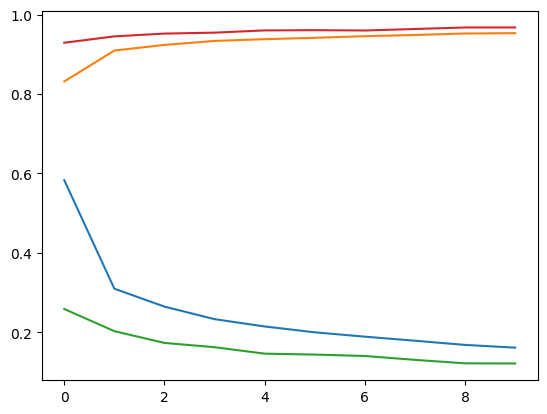

In [4]:
plt.plot(sgd_df)

In [14]:
## Using Adam Optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics='accuracy')
history1=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0965 - accuracy: 0.9717 - val_loss: 0.0876 - val_accuracy: 0.9762
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0880 - accuracy: 0.9737 - val_loss: 0.0901 - val_accuracy: 0.9760
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0847 - accuracy: 0.9741 - val_loss: 0.0915 - val_accuracy: 0.9746
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0851 - accuracy: 0.9740 - val_loss: 0.0878 - val_accuracy: 0.9778
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0809 - accuracy: 0.9758 - val_loss: 0.0861 - val_accuracy: 0.9782
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0808 - accuracy: 0.9751 - val_loss: 0.0801 - val_accuracy: 0.9786
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0815 - accuracy: 0.9755 - val_loss: 0.0834 - val_accuracy:

In [15]:
df_adam=pd.DataFrame(data=history1.history)

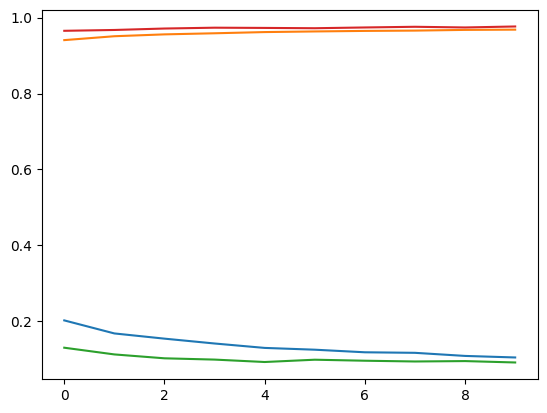

In [7]:
plt.plot(df_adam)

In [9]:
## Using RMS Prop Optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics='accuracy')
history2=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.0981 - accuracy: 0.9716 - val_loss: 0.0942 - val_accuracy: 0.9780
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0969 - accuracy: 0.9720 - val_loss: 0.0925 - val_accuracy: 0.9754
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0936 - accuracy: 0.9728 - val_loss: 0.0997 - val_accuracy: 0.9744
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0953 - accuracy: 0.9721 - val_loss: 0.0990 - val_accuracy: 0.9752
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0915 - accuracy: 0.9722 - val_loss: 0.0933 - val_accuracy: 0.9776
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0942 - accuracy: 0.9734 - val_loss: 0.1000 - val_accuracy: 0.9756
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0898 - accuracy: 0.9733 - val_loss: 0.1037 - val_accurac

In [10]:
df_rms=pd.DataFrame(data=history2.history)

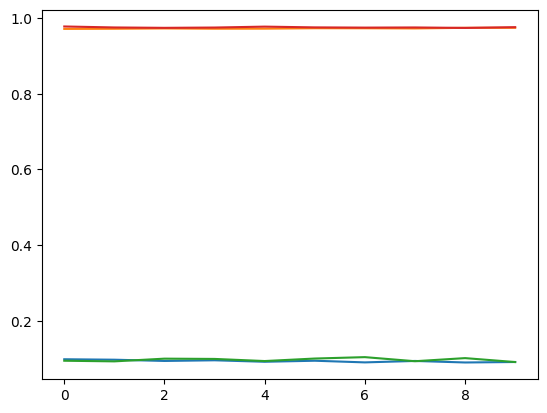

In [11]:
plt.plot(df_rms)

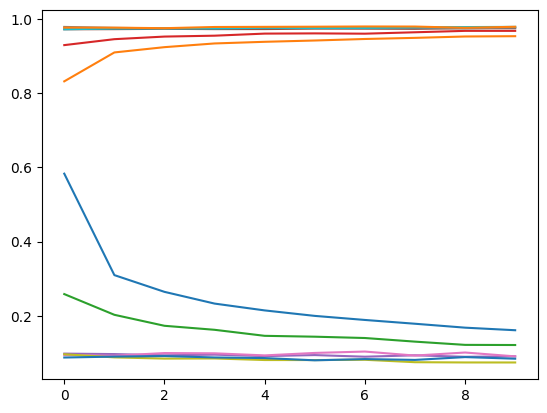

In [16]:
plt.plot(pd.concat([sgd_df,df_rms,df_adam],axis=1))

### Discuss the considerations and tradeoffs when choosing the appropriate optimizer for a given neural network architecture and task. onsider factors such as convergence speed, stability, and generalization performance.

Choosing the appropriate optimizer for a neural network involves considering various factors and trade-offs, including convergence speed, stability, and generalization performance. Here are some key considerations:

1. **Convergence Speed:**
   - Different optimizers may converge at different rates. Some optimizers, like Adam, often converge faster than others due to their adaptive learning rates and momentum.
   - However, the convergence speed may vary depending on the specific architecture of the neural network and the characteristics of the dataset.

2. **Stability:**
   - Stability refers to the ability of the optimizer to consistently converge to a solution without oscillating or diverging.
   - Some optimizers, such as RMSprop, are designed to address issues of stability by adapting learning rates based on the magnitude of gradients.
   - Optimizers with momentum, like Adam, can also improve stability by smoothing out updates and preventing large fluctuations in parameter updates.

3. **Generalization Performance:**
   - Generalization performance measures how well the trained model performs on unseen data.
   - Optimizers that prevent overfitting, such as those with adaptive learning rates, can lead to better generalization performance by controlling the complexity of the model during training.
   - Regularization techniques, such as dropout or weight decay, can also complement the choice of optimizer to improve generalization.

4. **Computational Efficiency:**
   - Some optimizers may be computationally more expensive than others due to the additional calculations involved in adaptive learning rates or momentum updates.
   - For large-scale models or datasets, it's essential to consider the computational resources required by the chosen optimizer.

5. **Robustness to Hyperparameters:**
   - Different optimizers have hyperparameters that need to be tuned, such as learning rates, momentum coefficients, or decay rates.
   - The sensitivity of the optimizer to these hyperparameters can impact its performance and ease of use. Optimizers with fewer hyperparameters or those less sensitive to their values may be preferred in practice.

6. **Task-Specific Considerations:**
   - The nature of the task at hand may influence the choice of optimizer. For example, tasks with sparse gradients may benefit from optimizers like Adam that adaptively adjust learning rates.
   - Different optimizers may perform better on specific types of data or architectures. Experimentation and empirical validation are often necessary to determine the most suitable optimizer for a given task.

In summary, choosing the appropriate optimizer involves balancing considerations such as convergence speed, stability, generalization performance, computational efficiency, robustness to hyperparameters, and task-specific requirements. It often requires empirical evaluation and experimentation to find the optimizer that best suits the neural network architecture and the goals of the task.

## The End